# Red Neuronal de reconocimento facial

### El proyecto consiste en una red neuronal que recibe imagenes de entrada para entrenamiento (donde se indica los nombres de las personas de cada imagen) de la misma red, posteriormente se introducen imagenes de prueba, sin nombres, para que la red neuronal indique el nombre de la persona

#### Conozcan a Riho takada:
![title](RihoTakadaFULL.jpg)

#### Y a Rui Kiriyama:
![Rui](RuiKiriyamaFULL.jpg)
(Si... un poco pervertido el asunto, pero #YOLO)

#### Quienes serán nuestras modelos, se entrenará la red con una variedad de imagenes de ellas, incluyendo el nombre para que esta aprenda a hacer el reconocimiento facial.
#### Por simplicidad, nos ahorramos el paso de detección facial (es decir, de una foto completa, que el algoritmo encuentre el rosto) y solamente pasaremos el rostro para hacer el entrenamiento. Si sobra tiempo, realizaremos también la detección facial
#### Las imagenes se pasarán en un formato .png con un tamaño de 300 x 300 px
### ACTUALIZACIÓN:
#### Las imagenes se van a pasar en formato .png con tamaño de 30 x 30 px, inicialmente se pasará cada pixel como entrada a la red neuronal

##### Sin más por el momento comencemos con el código, ¿si?

###### Primero realizaremos la red (Primer objetivo propuesto)

In [183]:
import numpy as np

#La red neuronal 
#Primero hay que calcular feed-forward
#Después hay que calcular el error
#Ya calculado el error se realiza el back-propagation
#Se actualizan los pesos        

class neuralnet:
    def __init__(self, inpn):
        self.inputneurons=inpn #Numero de neuronas de entrada
        self.outputneurons=2 #Numero de neuronas de salida, como ya sé que van a ser sólo dos, de una vez la fijo en 2
        
        #Iniciamos las capas ocultas como un arreglo de zeros
        #Iniciamos los pesos
        self.w1=np.random.randn(inpn, inpn)
        self.w2=np.random.randn(inpn, 2)
        
    #Función sigmoide
    def sigmoid(self, x, d):
        """
        Función sigmoide
        Entrada: variable flotante X (valor inicial de una neurona de la capa oculta), booleano D para definir si queremos la derivada o la función original
        Salida: el resultado de aplicar a X la función sigmoide (o su derivada)
        """
        if (d == True):
            return x*(1-x)
        else:
            return 1/(1+np.exp(-x))
    
    #Para entrenar la red, recibe un ejemplo de entrenamiento y el número de epocas de entrenamiento deseadas, de preferencia arriba de 10000
    #PROBAREMOS SOLO CON UNA CAPA OCULTA, AHORITA ESTA COSA TARDA AÑOS LITERAL PARA CORRER...
    def train(self, inputarr, Y, epoch):
        #PRIMERA PRUEBA, QUE CADA PIXEL DE LA ENTRADA SEA UNA NEURONA DE ENTRADA
        X=inputarr.flatten().reshape(1,self.inputneurons)
        graphvar=[]
        for e in range(epoch):
            #Feed-forward
            h0 = self.sigmoid(np.dot(X, self.w1), False)
            #h1 = self.sigmoid(np.dot(h0, self.w2), False)
            #h2 = self.sigmoid(np.dot(h1, self.w3), False)
            Outl = self.sigmoid(np.dot(h0, self.w2), False)
            
            #Calculo de error
            error_calc= Y - Outl
            
            #BonitoDebug
            #if(e%1000==0):
            #    graphvar.append(np.mean(np.abs(error_calc)))
            #    print("Error medio: " + str(np.mean(np.abs(error_calc))))
                
            #Back-Propagation
            outDelta = error_calc*self.sigmoid(Outl, True)            
            h0err = outDelta.dot(self.w2.T)
            h0Delta = h0err * self.sigmoid(h0, True)

            #Actualización de pesos
            self.w1+=X.T.dot(h0Delta)
            self.w2+=h0.T.dot(outDelta)
        
        #Para efectos prácticos graficaremos esta babosada, a ver si está aprendiendo o no
       # graphx=[i for i in range(len(graphvar))]
       # plt.plot(graphx, graphvar)
        
    def test(self, testarr):
        X=testarr.flatten().reshape(1,self.inputneurons)
        l0 = self.sigmoid(np.dot(X, self.w1), False)
        self.pred_o = self.sigmoid(np.dot(l0, self.w2), False)
        if self.pred_o[0][0]>self.pred_o[0][1]:
            print("Predicción: Rui Kiriyama")
        else:
            print("Predicción: Takada Riho")
        

###### Como hacer que Python abra imagenes sin morir en el intento

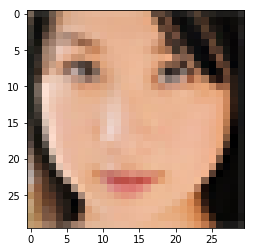

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Lo dejamos en una función porque será más practico llenar un arreglo con los nombres de los archivos y cargarlos en automático
#Que hacer todo "a patita"
def Abrir(nom):
    return mpimg.imread(nom)

#Probemos la wea anterior
img = Abrir('RuiFace30by30.png')
imgplot = plt.imshow(img)

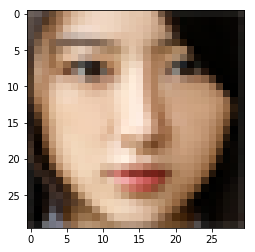

In [185]:
img2 = Abrir('RihoFace30by30.png')
imgplot = plt.imshow(img2)

In [186]:
'''
    Ya que vimos que si funciona esto, tenemos que asociar el nombre a cada imagen, lo ideal sería crear objetos de entrenamiento
    donde podamos poner absolutamente TODA la información relevante de las imagenes, como nombre, características, y la misma imagen obviamente
'''

#TODO: Extraer las características 
class TrainingElem:
    #Acá irán las demás features
    def __init__(self, name, path):
        self.name=name
        self.img=Abrir(path)
        
"""
train1 = TrainingElem('Rui Kiriyama', 'RuiKiriyama.png')
imgplot = plt.imshow(train1.img)
plt.show()
print(train1.name)
train2 = TrainingElem('Takada Riho', 'TakadaRiho.png')
print(train2.name)
imgplot = plt.imshow(train2.img)
"""


"\ntrain1 = TrainingElem('Rui Kiriyama', 'RuiKiriyama.png')\nimgplot = plt.imshow(train1.img)\nplt.show()\nprint(train1.name)\ntrain2 = TrainingElem('Takada Riho', 'TakadaRiho.png')\nprint(train2.name)\nimgplot = plt.imshow(train2.img)\n"

#### DE MOMENTO
##### Hicimos que la entrada sea forzosa de 30 x 30 pixeles, para la primera prueba entrenaremos la red pasando cada pixel como valor de entrada es decir, tendremos 900 neuronas de entrad; además usaremos 3 capas ocultas, para que no sea tan simple.
##### Como tenemos 2 modelos, sólo habrá 2 neuronas de salida: 1.- Rui Kiriyama : 2.- Riho Takada, en dado caso que la foto de la imagen correspondiera a una, se espera que la neurona de salida correspondiente tenga un 1 y la otra neurona un 0, es de aquí donde comenzaremos a corregir el error y modificar los pesos para entrenar la red

In [187]:
#Probemos un ejemplo, a ver si sirve la red neuronal
size=img.shape[0]*img.shape[1]
red=neuralnet(size)
#Para la Y = Y[0] Rui Kiriyama, Y[1] = Riho Takada
red.train(img[:,:,0], [1,0], 10000)
red.train(img2[:,:,0], [0,1], 10000)

KeyboardInterrupt: 

Predicción: Rui Kiriyama
[[  9.99242656e-01   4.85979538e-18]]


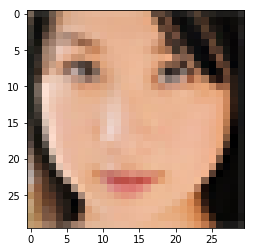

In [189]:
red.test(img[:,:,0])
imgplot = plt.imshow(img)
print(red.pred_o)